In [1]:
# Import libraries

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrix
import datetime


# Pretty display for notebooks

%matplotlib inline


# Allows the use of display() for DataFrames
from IPython.display import display 

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
weather = pd.read_csv("../asset/weather.csv")
key = pd.read_csv("../asset/key.csv")
submission_example = pd.read_csv("../asset/sampleSubmission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("weather  data : ", weather.shape)
print("key  data : ", key.shape)
print("submission  data : ", submission_example.shape)

coulmns_should_be_integer_type_of_data = ["tmax", "tmin", "tavg", "dewpoint", "wetbulb", "heat", "cool"]
coulmns_should_be_float_type_of_data = ["snowfall", "preciptotal", "stnpressure", "sealevel", "depart",\
                                        "resultspeed", "resultdir", "avgspeed"]

import pickle
import awesome_functions as cf

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_weather = weather.copy()
df_key = key.copy()
df_train_with_weather = pd.read_csv("df_train_with_weather_201806251508.csv")

cmap = sns.light_palette("orange", as_cmap=True)

Train data :  (4617600, 4)
Test  data :  (526917, 3)
weather  data :  (20517, 20)
key  data :  (45, 2)
submission  data :  (526917, 2)


In [16]:
station_2 = cf.getSpecifiedWeatherData(df_weather, 2)

In [3]:
cf.isThereNoneData(station_2)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,station_nbr,1035,0,0.00,0,0.00,0,0.0
1,date,1035,0,0.00,0,0.00,0,0.0
2,tmax,1035,1,0.10,0,0.00,0,0.0
3,tmin,1035,1,0.10,0,0.00,0,0.0
4,tavg,1035,12,1.16,0,0.00,0,0.0
5,depart,1035,43,4.15,0,0.00,0,0.0
6,dewpoint,1035,6,0.58,0,0.00,0,0.0
7,wetbulb,1035,16,1.55,0,0.00,0,0.0
8,heat,1035,12,1.16,0,0.00,0,0.0
9,cool,1035,12,1.16,0,0.00,0,0.0


In [17]:
station_2_t = cf.remove_m_row(station_2, ["tmax", "tmin", "tavg", "depart"])
station_2_dropped_all = cf.remove_m_row(station_2)

원본 데이터프레임 length : 1035
제거하고 싶은 컬럼 : ['tmax', 'tmin', 'tavg', 'depart']
제거한 int 컬럼 : ['tmax', 'tmin', 'tavg']
제거한 float 컬럼 : ['depart']
제거한 후 데이터프레임 length : 992
원본 데이터프레임 length : 1035
제거하고 싶은 컬럼 : ['station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']
제거한 int 컬럼 : ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset']
제거한 float 컬럼 : ['depart', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']
제거한 후 데이터프레임 length : 968


## 온도 컬럼만 m 벨류 제거함

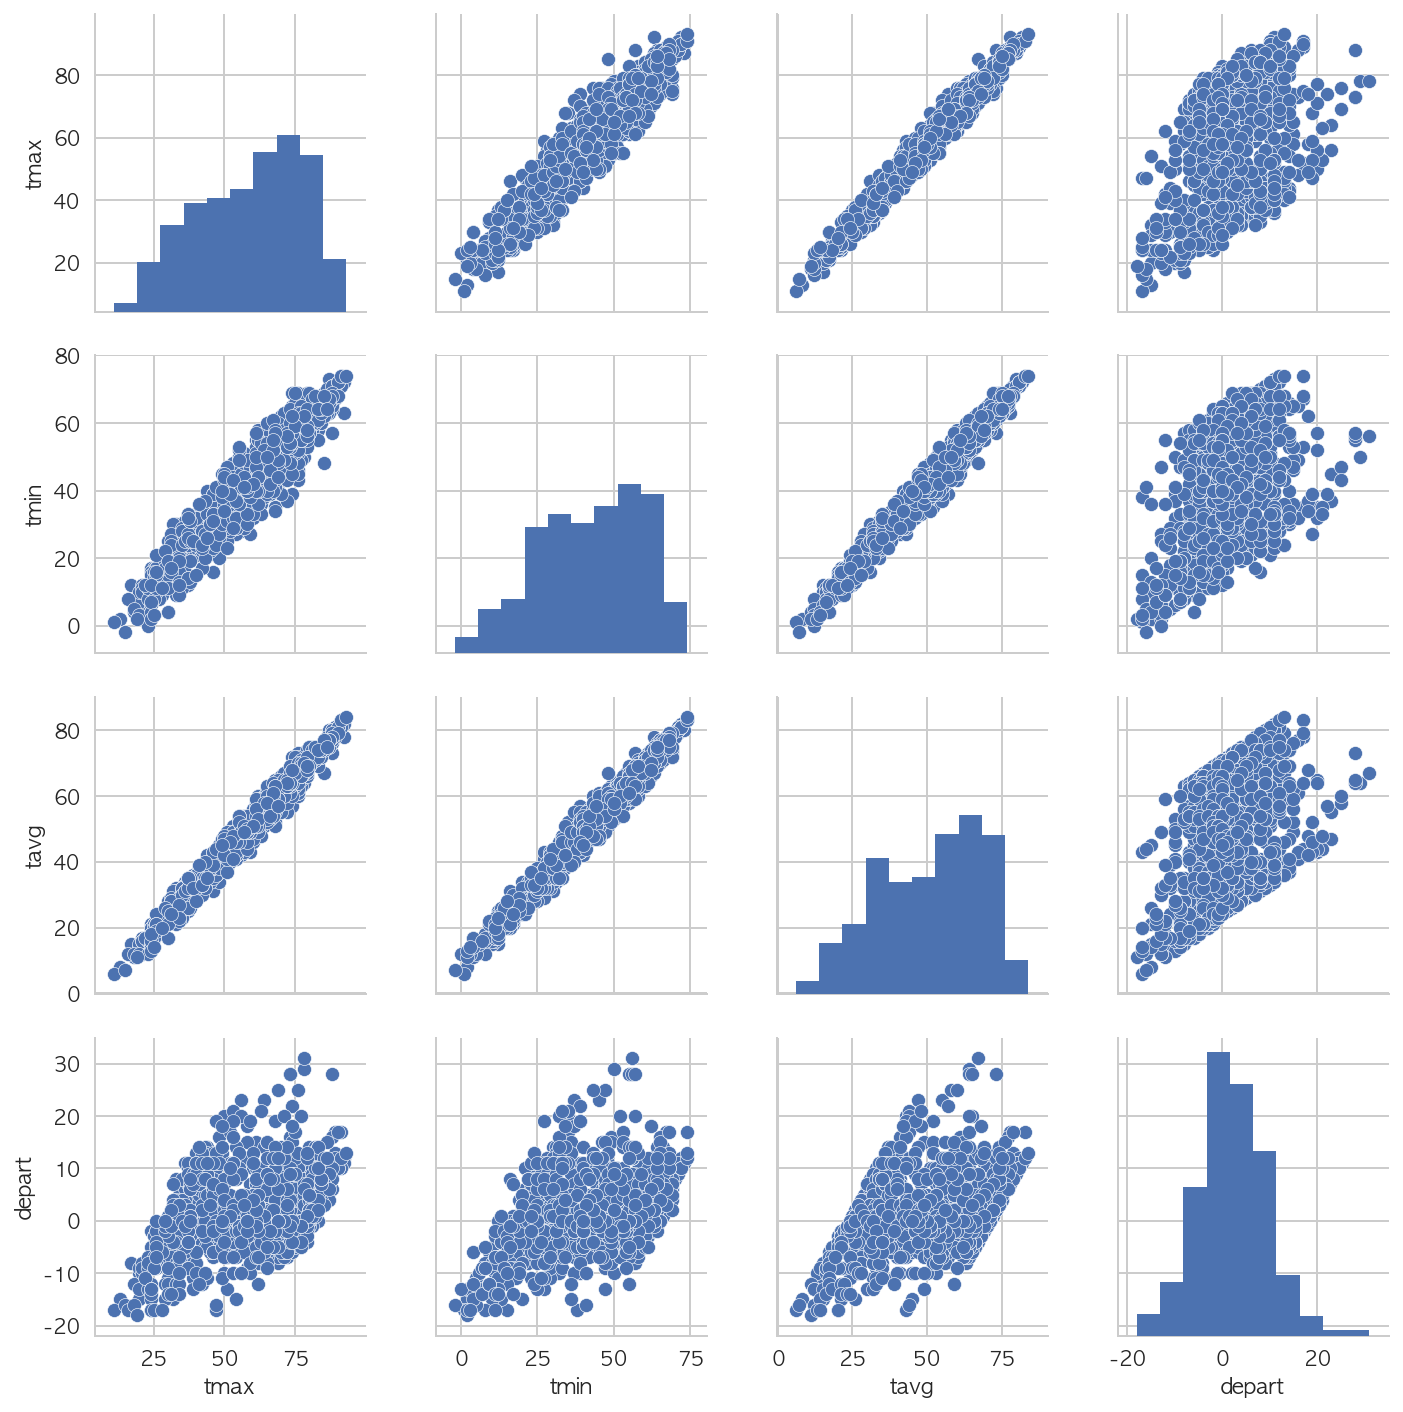

In [18]:
col_t = ["tmax", "tmin", "tavg", "depart"]
sns.pairplot(station_2_t[col_t])
plt.show()

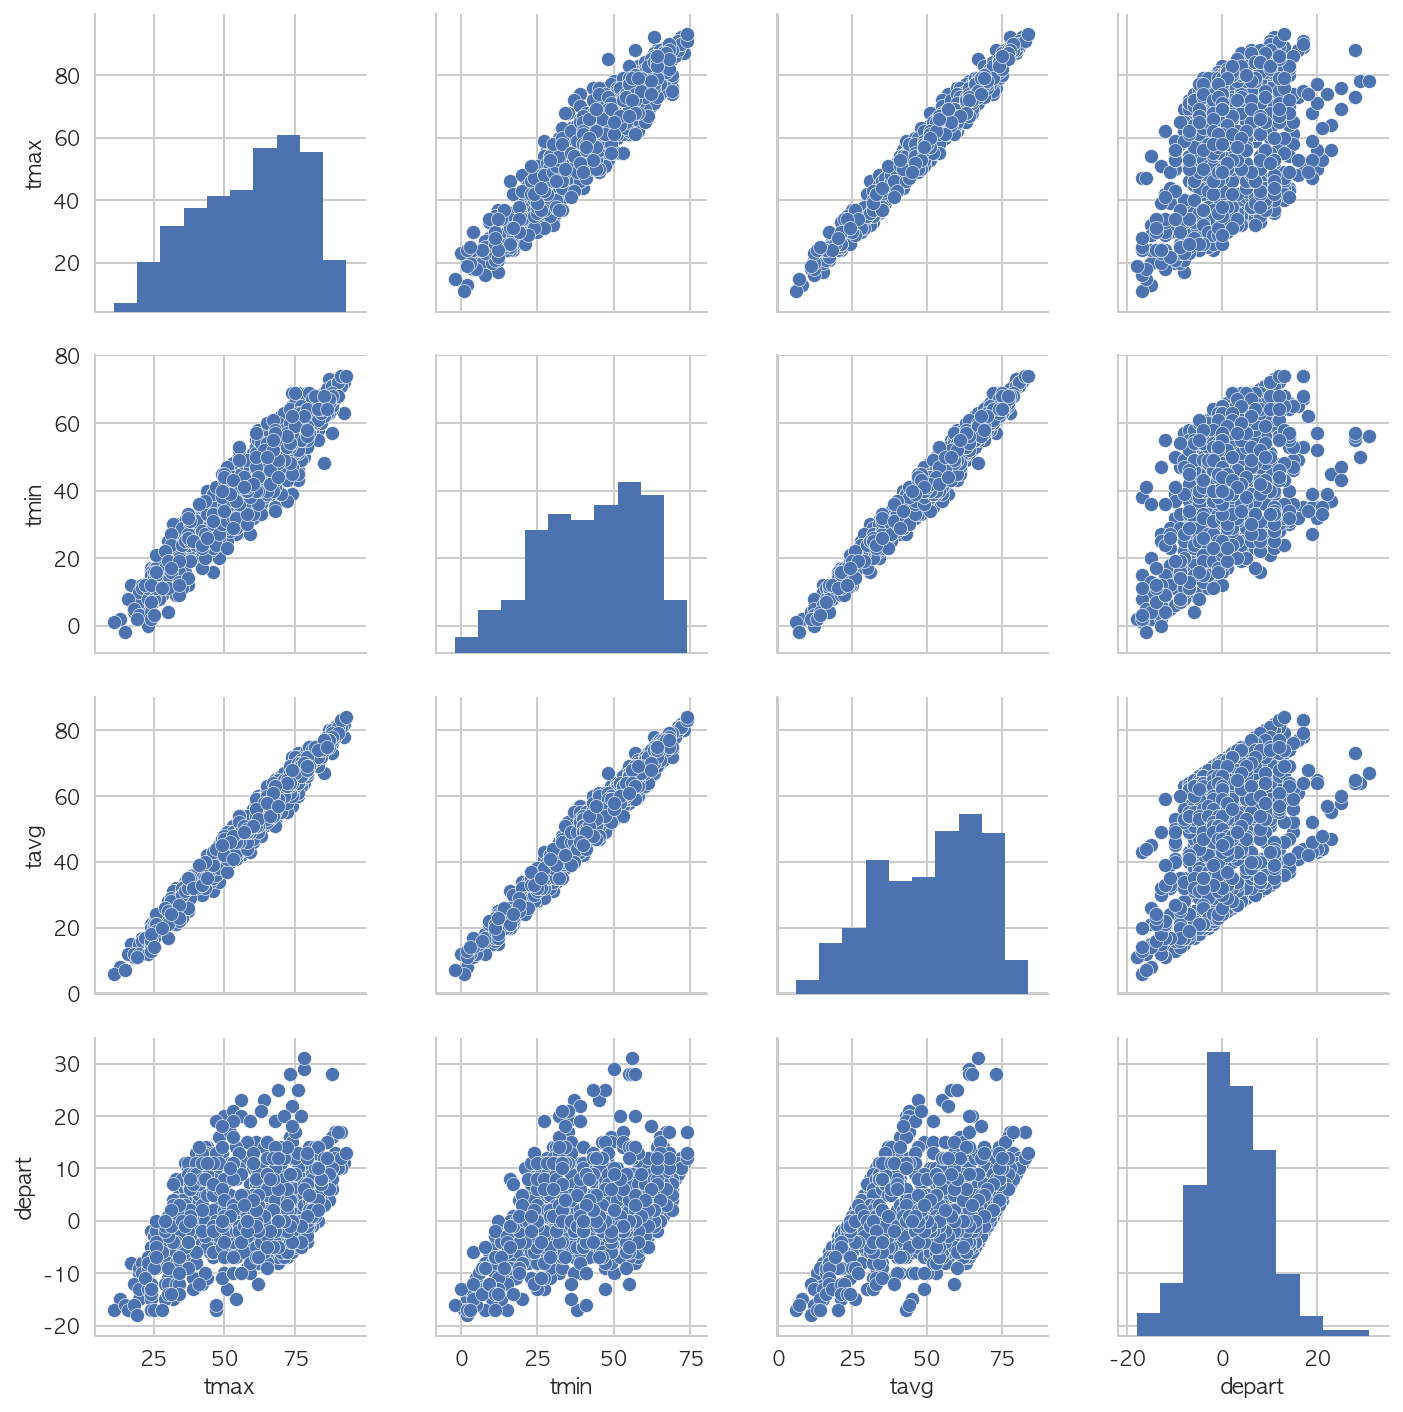

In [19]:
sns.pairplot(station_2_dropped_all[col_t])
plt.show()

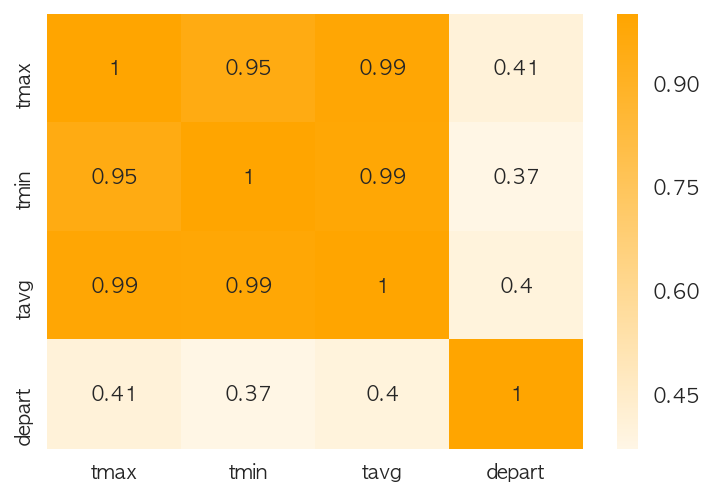

In [20]:
sns.heatmap(station_2_t[col_t].corr(), annot=True, cmap=cmap)
plt.show()

In [11]:
station_2_dew_wet = cf.remove_m_row(station_2, ["dewpoint", "wetbulb"])

원본 데이터프레임 length : 1035
제거하고 싶은 컬럼 : ['dewpoint', 'wetbulb']
제거한 int 컬럼 : ['dewpoint', 'wetbulb']
제거한 float 컬럼 : []
제거한 후 데이터프레임 length : 1019


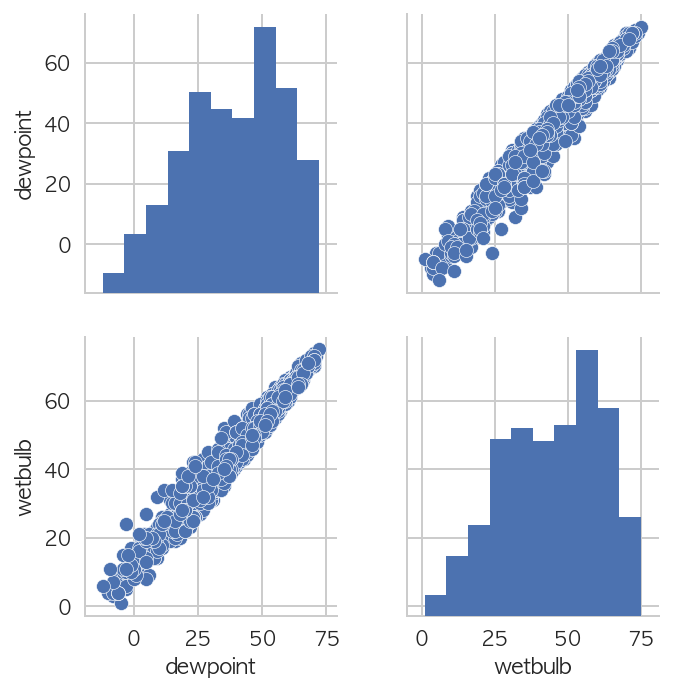

In [12]:
col_dw = ["dewpoint", "wetbulb"]
sns.pairplot(station_2_dew_wet[col_dw])
plt.show()

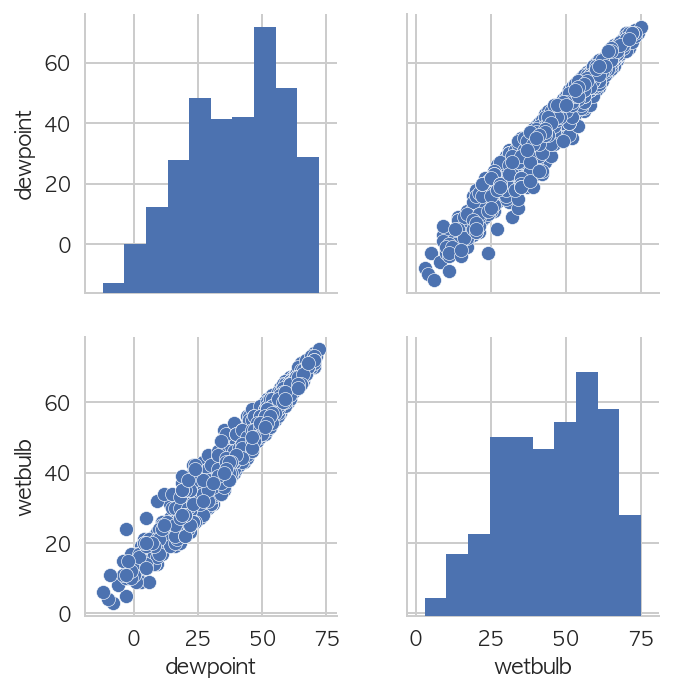

In [13]:
sns.pairplot(station_2_dropped_all[col_dw])
plt.show()

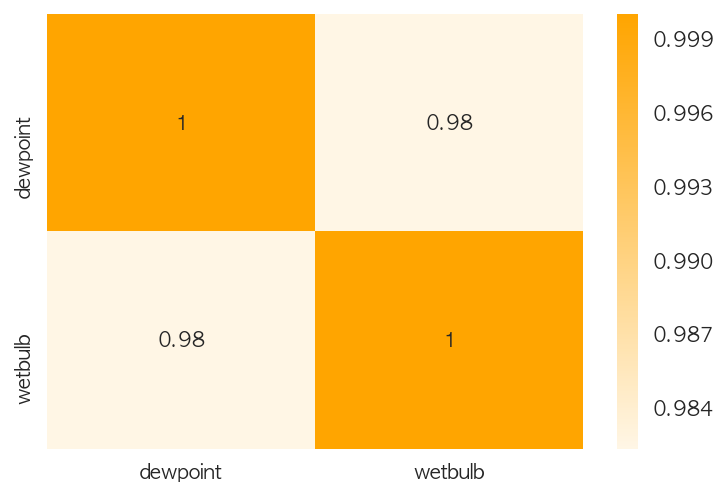

In [14]:
sns.heatmap(station_2_dew_wet[col_dw].corr(), annot=True, cmap=cmap)
plt.show()

1. tmax, tmin, tavg, depart
2. dewpoint, wetbulb, 
3. heat, cool, sunrise, sunset
4. snowfall, preciptotal, stnpressure, sealevel
5. resultspeed, resultdir, avgspeed

In [22]:
station_2_h_c = cf.remove_m_row(station_2, ["heat", "cool"])

원본 데이터프레임 length : 1035
제거하고 싶은 컬럼 : ['heat', 'cool']
제거한 int 컬럼 : ['heat', 'cool']
제거한 float 컬럼 : []
제거한 후 데이터프레임 length : 1023


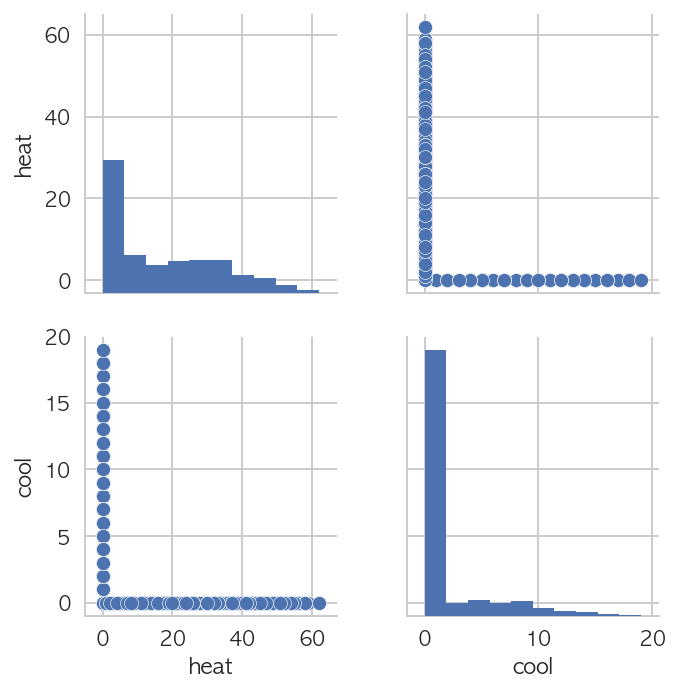

In [23]:
col_h_c = ["heat", "cool"]
sns.pairplot(station_2_h_c[col_h_c])
plt.show()

In [24]:
station_2_p_p = cf.remove_m_row(station_2, ["preciptotal", "stnpressure", "sealevel"])

원본 데이터프레임 length : 1035
제거하고 싶은 컬럼 : ['preciptotal', 'stnpressure', 'sealevel']
제거한 int 컬럼 : []
제거한 float 컬럼 : ['preciptotal', 'stnpressure', 'sealevel']
제거한 후 데이터프레임 length : 1024


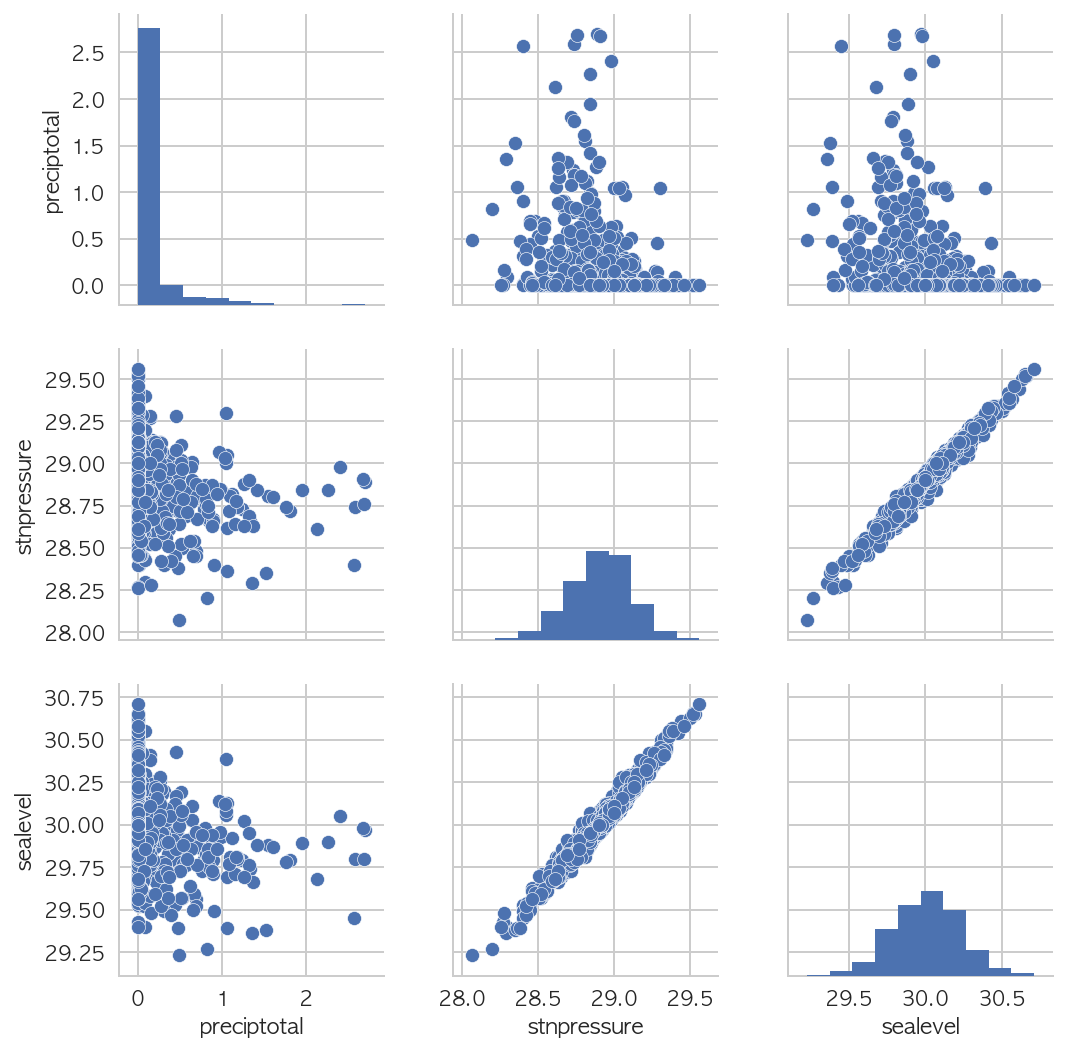

In [25]:
col_p_p = ["preciptotal", "stnpressure", "sealevel"]
sns.pairplot(station_2_p_p[col_p_p])
plt.show()

In [26]:
col_wind = ["resultspeed", "resultdir", "avgspeed"]
station_2_wind = cf.remove_m_row(station_2, col_wind)

원본 데이터프레임 length : 1035
제거하고 싶은 컬럼 : ['resultspeed', 'resultdir', 'avgspeed']
제거한 int 컬럼 : []
제거한 float 컬럼 : ['resultspeed', 'resultdir', 'avgspeed']
제거한 후 데이터프레임 length : 1029


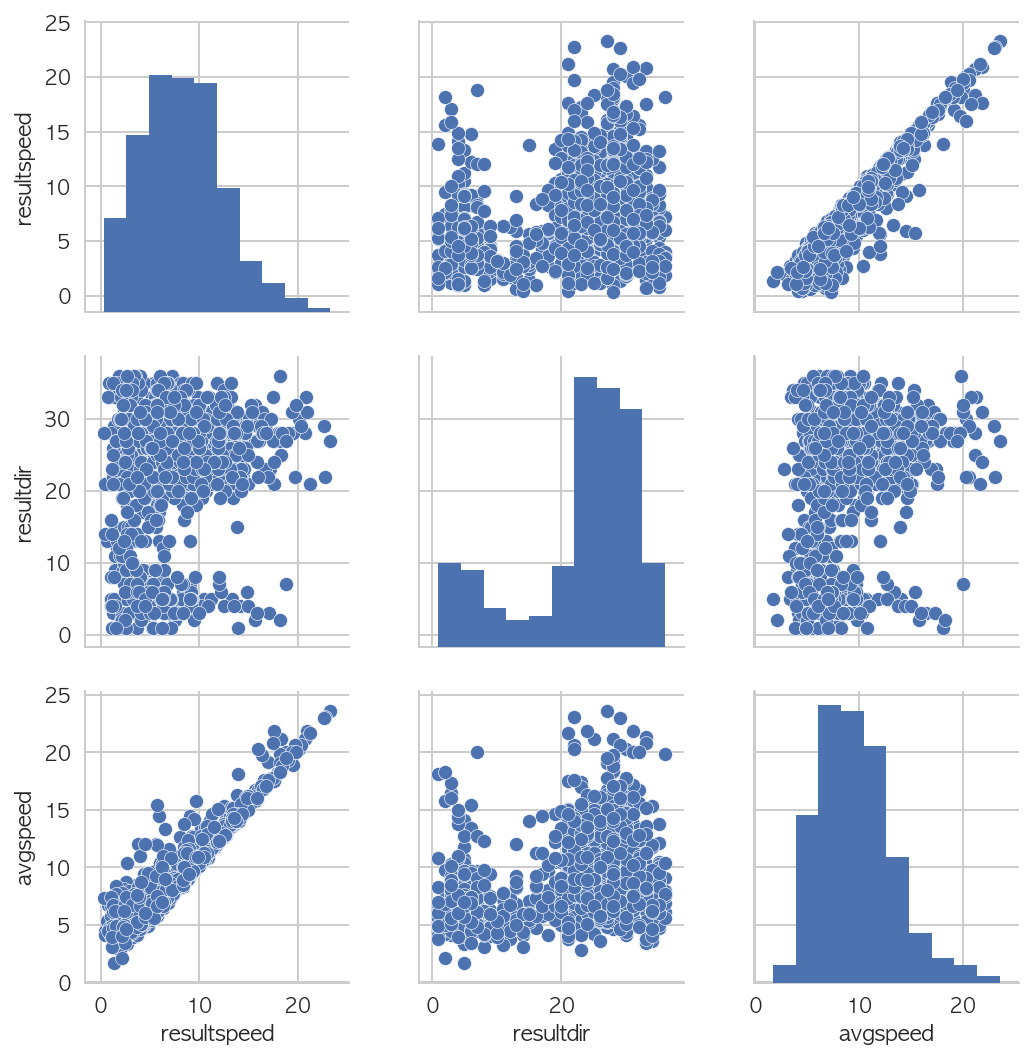

In [27]:
sns.pairplot(station_2_wind[col_wind])
plt.show()